### This notebook demonstrates how to generate samples from the likelihood, or compute the likelihood of a point in parameter space

In [1]:
from lenslikelihood.sampling import InterpolatedLikelihood
import numpy as np
from trikde.pdfs import DensitySamples, IndepdendentLikelihoods
import os
import pickle
from lenslikelihood.measurements import all_lens_names
import matplotlib.pyplot as plt

First load the likelihood you want to use

In [2]:
nbins = 20
likelihoods_coupled = []

filename_extension_coupled = '_joint_coupled'
base_path = './../lenslikelihood/precomputed_likelihoods/'
print(all_lens_names)
for lens in all_lens_names:
    
    fname = base_path + lens + filename_extension_coupled
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods_coupled.append(single_lens_likelihood)
  
likelihood_coupled = IndepdendentLikelihoods(likelihoods_coupled)

['B1422', 'HE0435', 'WGD2038', 'WGDJ0405', 'WFI2033', 'PSJ1606', 'WFI2026', 'RXJ0911', 'RXJ1131', 'MG0414', 'PG1115', 'B0128']


Plot it

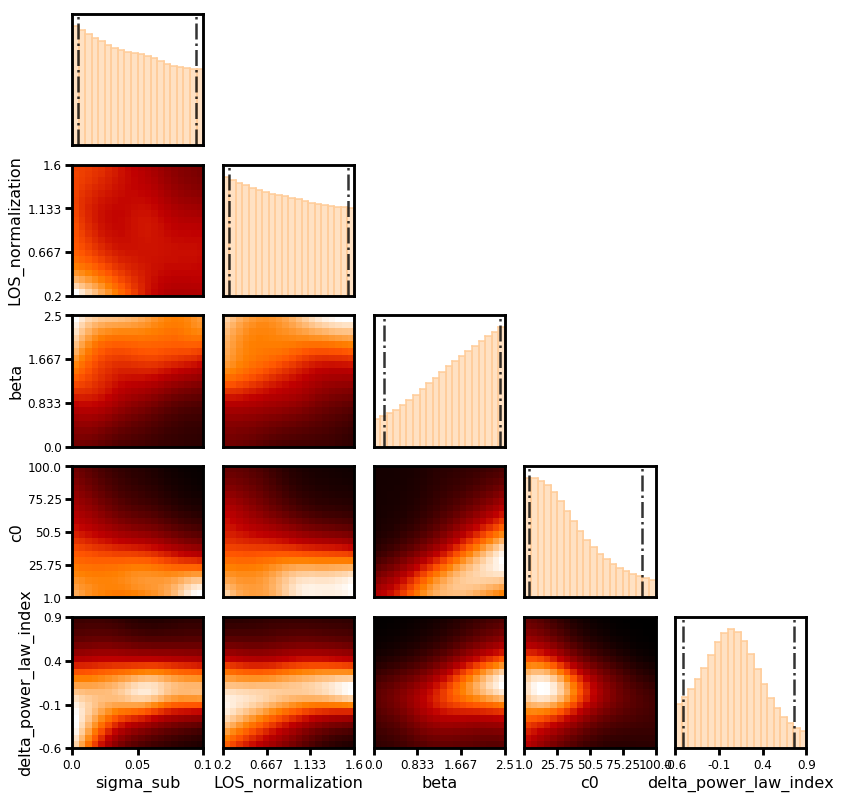

In [12]:
from trikde.triangleplot import TrianglePlot

triplot = TrianglePlot([likelihood_coupled])
_ = triplot.make_triplot(show_contours=False, filled_contours=False)

### Evaluate the likelihood, or sample from it

Initialize the class InterpolatedLikelihood by passing in an instance of IndepdendentLikelihoods, the parameter names, and the parameter ranges. You can then evaluate the likelihood of a point in parameter space by calling the class passing in a tuple with the coordiantes in parameter space. You can also generate samples from the likelihood using the "sample" method. 

point 1:  (0.04, 0.9, 0.9, 20.0, 0.0)
likelihood of point 1:  0.12699537472393527
point 2:  (0.04, 0.9, 0.9, 90.0, 0.0)
likelihood of point 2:  0.01182824064212267


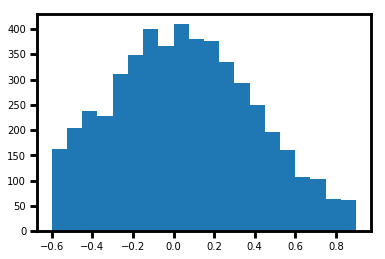

In [11]:
param_names = likelihood_coupled.param_names
param_ranges = likelihood_coupled.param_ranges
interpolated_likelihood = InterpolatedLikelihood(likelihood_coupled, param_names, param_ranges)

sigma_sub, los_norm, beta, c0, delta_plaw_index = 0.04, 0.9, 0.9, 20., 0.
point_in_parameter_space_1 = (sigma_sub, los_norm, beta, c0, delta_plaw_index)
sigma_sub, los_norm, beta, c0, delta_plaw_index = 0.04, 0.9, 0.9, 90., 0.
point_in_parameter_space_2 = (sigma_sub, los_norm, beta, c0, delta_plaw_index)
likelihood_of_point_1 = interpolated_likelihood(point_in_parameter_space_1)
likelihood_of_point_2 = interpolated_likelihood(point_in_parameter_space_2)
print('point 1: ', point_in_parameter_space_1)
print('likelihood of point 1: ', likelihood_of_point_1)
print('point 2: ', point_in_parameter_space_2)
print('likelihood of point 2: ', likelihood_of_point_2)

samples_from_likelihood = interpolated_likelihood.sample(5000)
column_index = param_names.index('delta_power_law_index')
delta_power_law_index_samples = samples_from_likelihood[:, column_index]
_ = plt.hist(delta_power_law_index_samples, range=(-0.6, 0.9), bins=20)